In [51]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Expectation: 0.499074447985136
Variance: 0.09255057751034329


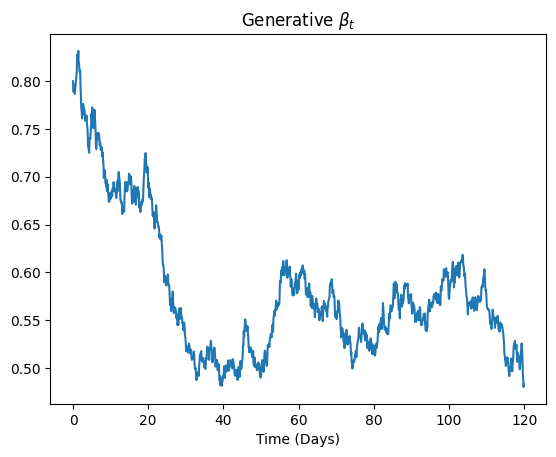

In [52]:
'''Simulated Data, setting up the SIR model'''

rng = np.random.default_rng(100)

gamma = 1/14
eta = 1/7
q = 0.1
mu = 0.004

T = 120
dt = 0.1
t_vec = np.arange(0,T,dt)

N = 100_000
I = 5
E = 5

'''OU params'''
lam = 1/20
mean_ou = -0.7
sig = 0.1

print(f"Expectation: {np.exp(mean_ou + (sig**2)/2)}")
print(f"Variance: {np.exp(sig**2 - 1) * np.exp(2 * mean_ou + sig**2)}")


A = np.exp(-lam * dt)
M = mean_ou * (np.exp(-lam * dt) - 1)
C = sig * np.sqrt(1 - np.exp(-2 * lam * dt))

betas = np.zeros_like(t_vec)
betas[0] = 0.8
for time_index in range(1,len(t_vec)):
    betas[time_index] = np.exp(A * np.log(betas[time_index - 1]) - M + C * rng.normal(0,1))

state = np.zeros((5,len(t_vec)))
state[:,0] = np.array([N - I - E,E, I, 0,0])

plt.title('Generative $\\beta_t$')
plt.xlabel('Time (Days)')
plt.plot(t_vec,betas)

for time_index in range(1,len(t_vec)):

    new_E = (betas[time_index - 1] * (state[1,time_index -1] + q * state[2,time_index - 1]) * state[0,time_index - 1]/np.sum(state[:,time_index-1])) * dt
    new_I = (eta * state[1,time_index - 1]) * dt
    new_ER = (gamma * state[1,time_index -1]) * dt
    new_IR = (gamma * state[2,time_index - 1]) * dt
    new_D = (mu * state[2,time_index - 1]) * dt


    state[0,time_index] = state[0,time_index - 1] - new_E #S 
    state[1,time_index] = state[1,time_index - 1] + new_E - new_I - new_ER
    state[2,time_index] = state[2,time_index-1] + new_I - new_IR - new_D
    state[3,time_index] = state[3,time_index - 1] + new_ER + new_IR #R
    state[4,time_index] = new_I

    

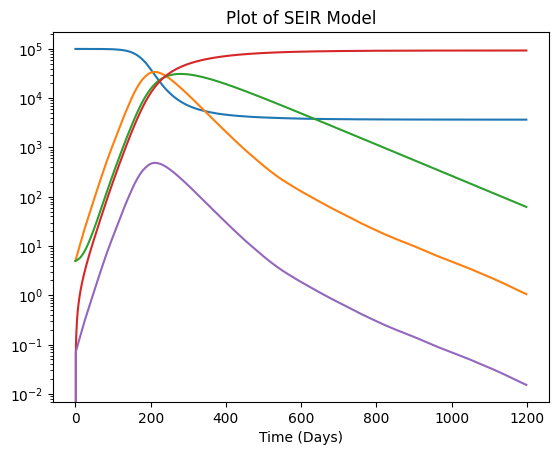

In [53]:
plt.yscale('log')
plt.title('Plot of SEIR Model')
plt.xlabel('Time (Days)')
plt.plot(state.T[:])

pd.DataFrame(state).to_csv('../data_sets/ou_state_nbinom.csv',index = False)
pd.DataFrame(betas).to_csv('../data_sets/ou_betas_nbinom.csv',index = False)

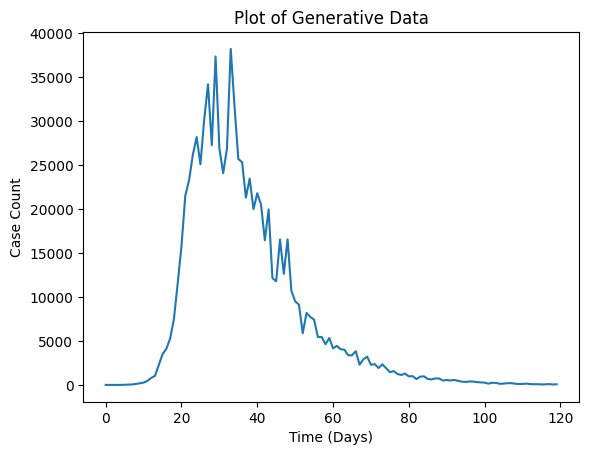

In [54]:
r = 50

data = np.expand_dims(rng.negative_binomial(n = r,p = r/(r + state[2,::int(1/dt)] + 0.005)),0)

plt.title('Plot of Generative Data')
plt.xlabel('Time (Days)')
plt.ylabel('Case Count')
plt.plot(t_vec[::int(1/dt)],data.T)

In [55]:
pd.DataFrame(data).to_csv('../data_sets/ou_data_nbinom.csv',index = False)